In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [3]:
df_1 = pd.read_csv("forecasts\weather_data_forecast_1day.csv")
df_2 = pd.read_csv("forecasts\weather_data_forecast_2day.csv")
df_3 = pd.read_csv("forecasts\weather_data_forecast_3day.csv")
df_4 = pd.read_csv("forecasts\weather_data_forecast_4day.csv")
df_5 = pd.read_csv("forecasts\weather_data_forecast_5day.csv")

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ville             26000 non-null  object 
 1   Latitude          26000 non-null  float64
 2   Longitude         26000 non-null  float64
 3   Date              26000 non-null  object 
 4   Temp_Max          26000 non-null  float64
 5   Temp_Min          26000 non-null  float64
 6   Humidity          26000 non-null  int64  
 7   Weather           26000 non-null  object 
 8   Rain_Probability  26000 non-null  float64
 9   Weather_Score     26000 non-null  int64  
 10  Temp_Avg          26000 non-null  float64
 11  Run_Date          26000 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 2.4+ MB


In [43]:
# Ajouter un suffixe aux colonnes pour les distinguer
df_1 = df_1.add_suffix('_jour1')
df_2 = df_2.add_suffix('_jour2')
df_3 = df_3.add_suffix('_jour3')
df_4 = df_4.add_suffix('_jour4')
df_5 = df_5.add_suffix('_jour5')


In [44]:
# Combiner les fichiers en un seul DataFrame
all_data = pd.concat([df_1, df_2, df_3, df_4, df_5], axis=1)

# Vérifier le DataFrame résultant
display(all_data.head())

,Ville_jour1,Latitude_jour1,Longitude_jour1,Date_jour1,Temp_Max_jour1,Temp_Min_jour1,Humidity_jour1,Weather_jour1,Rain_Probability_jour1,Weather_Score_jour1,Temp_Avg_jour1,Run_Date_jour1,Ville_jour2,Latitude_jour2,Longitude_jour2,Date_jour2,Temp_Max_jour2,Temp_Min_jour2,Humidity_jour2,Weather_jour2,Rain_Probability_jour2,Weather_Score_jour2,Temp_Avg_jour2,Run_Date_jour2,Ville_jour3,Latitude_jour3,Longitude_jour3,Date_jour3,Temp_Max_jour3,Temp_Min_jour3,Humidity_jour3,Weather_jour3,Rain_Probability_jour3,Weather_Score_jour3,Temp_Avg_jour3,Run_Date_jour3,Ville_jour4,Latitude_jour4,Longitude_jour4,Date_jour4,Temp_Max_jour4,Temp_Min_jour4,Humidity_jour4,Weather_jour4,Rain_Probability_jour4,Weather_Score_jour4,Temp_Avg_jour4,Run_Date_jour4,Ville_jour5,Latitude_jour5,Longitude_jour5,Date_jour5,Temp_Max_jour5,Temp_Min_jour5,Humidity_jour5,Weather_jour5,Rain_Probability_jour5,Weather_Score_jour5,Temp_Avg_jour5,Run_Date_jour5
0,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.76,5.89,90,overcast clouds,0.0,200,6.325,2024-12-04,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.91,6.91,78,overcast clouds,0.00,200,6.91,2024-12-03,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.89,6.89,74,overcast clouds,0.0,200,6.89,2024-12-02,Paris,48.85889,2.320041,2024-12-05 00:00:00,7.68,7.68,77,overcast clouds,0.0,200,7.68,2024-12-01,Paris,48.85889,2.320041,2024-12-05,6.31,6.31,90,overcast clouds,0.00,200,6.31,2024-11-30
1,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.35,6.05,82,overcast clouds,0.0,200,6.200,2024-12-04,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.55,6.55,81,overcast clouds,0.00,200,6.55,2024-12-03,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.50,6.50,75,overcast clouds,0.0,200,6.50,2024-12-02,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.81,6.81,75,overcast clouds,0.0,200,6.81,2024-12-01,Paris,48.85889,2.320041,2024-12-05,7.05,7.05,86,overcast clouds,0.00,200,7.05,2024-11-30
2,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.62,6.62,70,overcast clouds,0.0,200,6.620,2024-12-04,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.63,6.63,72,overcast clouds,0.00,200,6.63,2024-12-03,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.47,6.47,76,overcast clouds,0.0,200,6.47,2024-12-02,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.71,6.71,79,overcast clouds,0.0,200,6.71,2024-12-01,Paris,48.85889,2.320041,2024-12-05,7.53,7.53,79,light rain,0.20,-10,7.53,2024-11-30
3,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.62,6.62,81,light rain,1.0,-10,6.620,2024-12-04,Paris,48.85889,2.320041,2024-12-05 00:00:00,7.10,7.10,80,light rain,0.24,-10,7.10,2024-12-03,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.53,6.53,75,overcast clouds,0.0,200,6.53,2024-12-02,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.78,6.78,75,overcast clouds,0.0,200,6.78,2024-12-01,Paris,48.85889,2.320041,2024-12-05,8.70,8.70,87,light rain,1.00,-10,8.70,2024-11-30
4,Paris,48.85889,2.320041,2024-12-05 00:00:00,7.91,7.91,86,light rain,1.0,-10,7.910,2024-12-04,Paris,48.85889,2.320041,2024-12-05 00:00:00,8.09,8.09,83,light rain,0.25,-10,8.09,2024-12-03,Paris,48.85889,2.320041,2024-12-05 00:00:00,7.49,7.49,74,overcast clouds,0.0,200,7.49,2024-12-02,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.81,6.81,80,light rain,1.0,-10,6.81,2024-12-01,Paris,48.85889,2.320041,2024-12-05,11.84,11.84,65,overcast clouds,0.81,200,11.84,2024-11-30


In [45]:
# Supprimer les colonnes "Ville" "Latitude" et "Longitude", "Date", "Run_Date" des jours 2 à 5
all_data.drop(columns=['Ville_jour2', 'Latitude_jour2', 'Longitude_jour2', 'Date_jour2', 'Run_Date_jour2',
                       'Ville_jour3', 'Latitude_jour3', 'Longitude_jour3', 'Date_jour3', 'Run_Date_jour3',
                       'Ville_jour4', 'Latitude_jour4', 'Longitude_jour4', 'Date_jour4', 'Run_Date_jour4',
                       'Ville_jour5', 'Latitude_jour5', 'Longitude_jour5', 'Date_jour5', 'Run_Date_jour5'], inplace=True)


In [46]:
all_data.shape

(26000, 40)

In [47]:
display(all_data.head())

,Ville_jour1,Latitude_jour1,Longitude_jour1,Date_jour1,Temp_Max_jour1,Temp_Min_jour1,Humidity_jour1,Weather_jour1,Rain_Probability_jour1,Weather_Score_jour1,Temp_Avg_jour1,Run_Date_jour1,Temp_Max_jour2,Temp_Min_jour2,Humidity_jour2,Weather_jour2,Rain_Probability_jour2,Weather_Score_jour2,Temp_Avg_jour2,Temp_Max_jour3,Temp_Min_jour3,Humidity_jour3,Weather_jour3,Rain_Probability_jour3,Weather_Score_jour3,Temp_Avg_jour3,Temp_Max_jour4,Temp_Min_jour4,Humidity_jour4,Weather_jour4,Rain_Probability_jour4,Weather_Score_jour4,Temp_Avg_jour4,Temp_Max_jour5,Temp_Min_jour5,Humidity_jour5,Weather_jour5,Rain_Probability_jour5,Weather_Score_jour5,Temp_Avg_jour5
0,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.76,5.89,90,overcast clouds,0.0,200,6.325,2024-12-04,6.91,6.91,78,overcast clouds,0.00,200,6.91,6.89,6.89,74,overcast clouds,0.0,200,6.89,7.68,7.68,77,overcast clouds,0.0,200,7.68,6.31,6.31,90,overcast clouds,0.00,200,6.31
1,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.35,6.05,82,overcast clouds,0.0,200,6.200,2024-12-04,6.55,6.55,81,overcast clouds,0.00,200,6.55,6.50,6.50,75,overcast clouds,0.0,200,6.50,6.81,6.81,75,overcast clouds,0.0,200,6.81,7.05,7.05,86,overcast clouds,0.00,200,7.05
2,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.62,6.62,70,overcast clouds,0.0,200,6.620,2024-12-04,6.63,6.63,72,overcast clouds,0.00,200,6.63,6.47,6.47,76,overcast clouds,0.0,200,6.47,6.71,6.71,79,overcast clouds,0.0,200,6.71,7.53,7.53,79,light rain,0.20,-10,7.53
3,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.62,6.62,81,light rain,1.0,-10,6.620,2024-12-04,7.10,7.10,80,light rain,0.24,-10,7.10,6.53,6.53,75,overcast clouds,0.0,200,6.53,6.78,6.78,75,overcast clouds,0.0,200,6.78,8.70,8.70,87,light rain,1.00,-10,8.70
4,Paris,48.85889,2.320041,2024-12-05 00:00:00,7.91,7.91,86,light rain,1.0,-10,7.910,2024-12-04,8.09,8.09,83,light rain,0.25,-10,8.09,7.49,7.49,74,overcast clouds,0.0,200,7.49,6.81,6.81,80,light rain,1.0,-10,6.81,11.84,11.84,65,overcast clouds,0.81,200,11.84


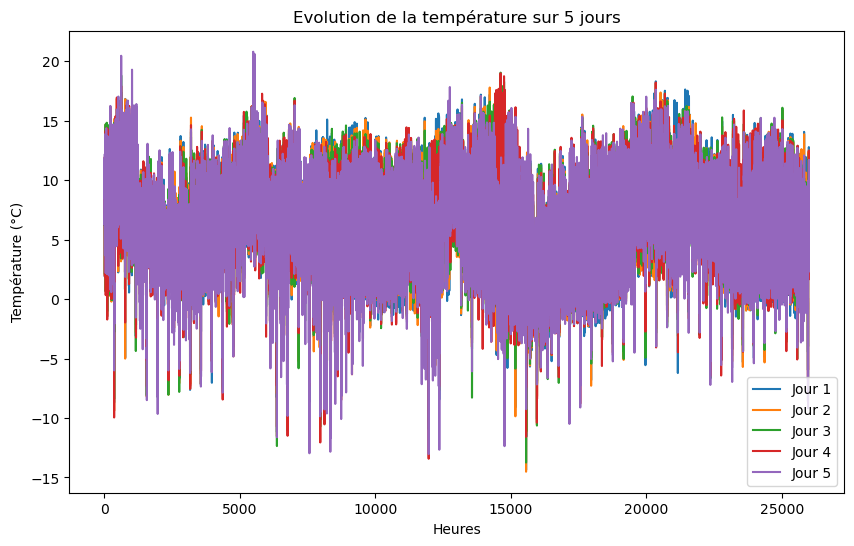

In [48]:
#comparer l'évolution de la température entre les 5 jours
plt.figure(figsize=(10, 6))
plt.plot(all_data['Temp_Avg_jour1'], label='Jour 1')
plt.plot(all_data['Temp_Avg_jour2'], label='Jour 2')
plt.plot(all_data['Temp_Avg_jour3'], label='Jour 3')
plt.plot(all_data['Temp_Avg_jour4'], label='Jour 4')
plt.plot(all_data['Temp_Avg_jour5'], label='Jour 5')
plt.legend()
plt.title("Evolution de la température sur 5 jours")
plt.xlabel("Heures")
plt.ylabel("Température (°C)")
plt.show()


c:\Users\j-bal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



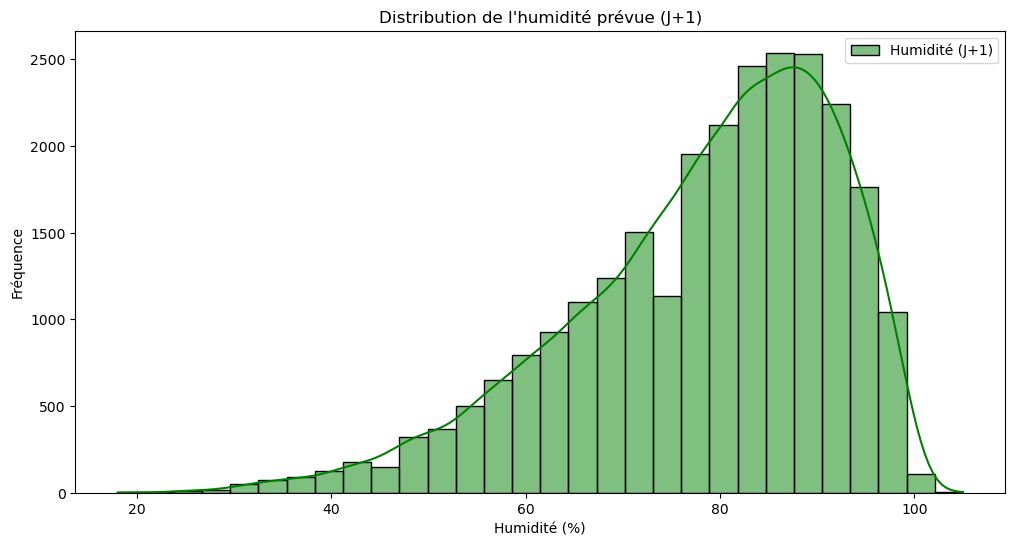

In [49]:
# Visualisation de l'humidité
plt.figure(figsize=(12, 6))
sns.histplot(all_data["Humidity_jour1"], bins=30, kde=True, color="green", label="Humidité (J+1)")
plt.xlabel("Humidité (%)")
plt.ylabel("Fréquence")
plt.title("Distribution de l'humidité prévue (J+1)")
plt.legend()
plt.show()

City with the Most Favorable Cumulative Weather 
City : Nice
Total Weather Score : 192370

 **Top 5 Cities with the Highest Weather Score** 
        Ville_jour1  Weather_Score_jour1
34             Nice               192370
0   Aix-en-Provence               191740
6             Arles               190180
29        Marseille               188630
47           Toulon               187400


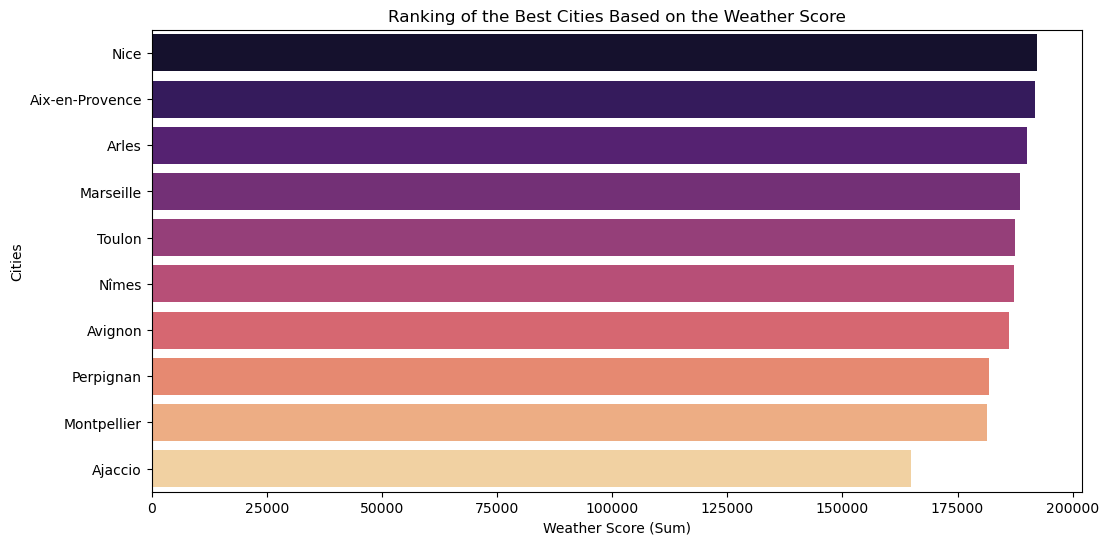

In [50]:
# Calculer le score total pour chaque ville pour le jour 1
city_ranking = all_data.groupby("Ville_jour1")["Weather_Score_jour1"].sum().reset_index()
    
# Trier les villes par meilleur score
city_ranking = city_ranking.sort_values(by="Weather_Score_jour1", ascending=False)

# Trouver la ville avec le meilleur score
best_city = city_ranking.iloc[0]

# Afficher les résultats
print("City with the Most Favorable Cumulative Weather ")
print(f"City : {best_city['Ville_jour1']}")
print(f"Total Weather Score : {best_city['Weather_Score_jour1']}")

print("\n **Top 5 Cities with the Highest Weather Score** ")
print(city_ranking.head(5))

# Visualisation du classement en barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Weather_Score_jour1", 
    y="Ville_jour1", 
    data=city_ranking.head(10), 
    palette="magma"
)
plt.xlabel("Weather Score (Sum)")
plt.ylabel("Cities")
plt.title("Ranking of the Best Cities Based on the Weather Score")
plt.show()


City with the Least Favorable Cumulative Weather 
City : Brest
Total Weather Score : 99870

 **Top 5 Cities with the Lowest Weather Score** 
         Ville_jour1  Weather_Score_jour1
13             Brest                99870
23          Le Havre               107550
44        Saint-Malo               111530
14              Caen               119970
12  Boulogne-sur-Mer               121190


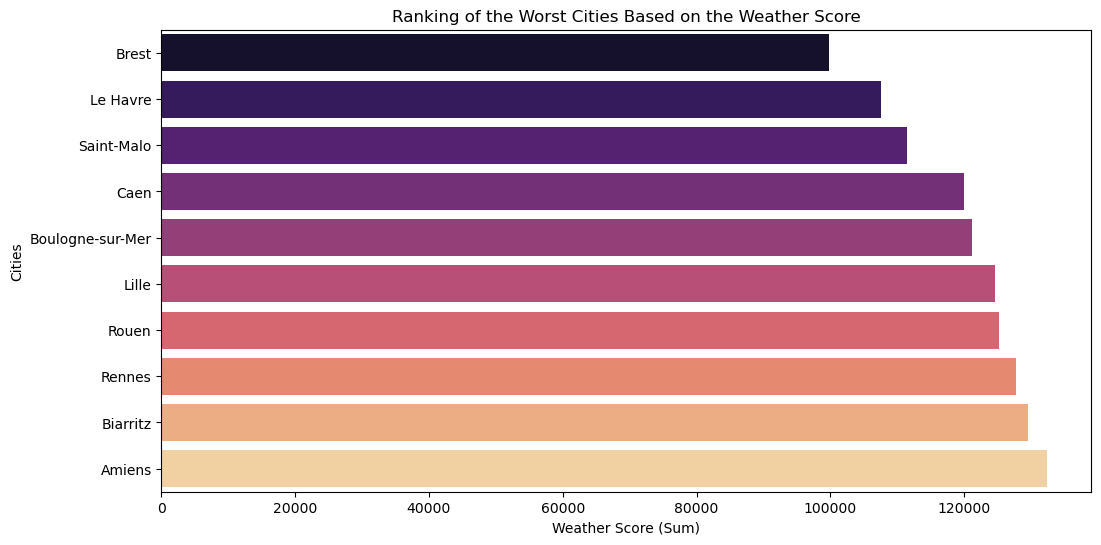

In [51]:
# Calculer le score total pour chaque ville pour le jour 1
city_ranking = all_data.groupby("Ville_jour1")["Weather_Score_jour1"].sum().reset_index()
    
# Trier les villes par meilleur score
city_ranking = city_ranking.sort_values(by="Weather_Score_jour1", ascending=True)

# Trouver la ville avec le meilleur score
best_city = city_ranking.iloc[0]

# Afficher les résultats
print("City with the Least Favorable Cumulative Weather ")
print(f"City : {best_city['Ville_jour1']}")
print(f"Total Weather Score : {best_city['Weather_Score_jour1']}")

print("\n **Top 5 Cities with the Lowest Weather Score** ")
print(city_ranking.head(5))

# Visualisation du classement en barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Weather_Score_jour1", 
    y="Ville_jour1", 
    data=city_ranking.head(10), 
    palette="magma"
)
plt.xlabel("Weather Score (Sum)")
plt.ylabel("Cities")
plt.title("Ranking of the Worst Cities Based on the Weather Score")
plt.show()


In [ ]:
# Vérifier si les colonnes existent
if all(col in all_data.columns for col in ["Weather_Score_jour1", "Latitude_jour1", "Longitude_jour1"]):
    
    # Calculer le score total pour chaque ville pour le jour 1
    city_ranking = all_data.groupby("Ville_jour1", as_index=False).agg({
        "Weather_Score_jour1": "sum",
        "Latitude_jour1": "first",
        "Longitude_jour1": "first"
    })
    
    # Trier les villes par meilleur score
    city_ranking = city_ranking.sort_values(by="Weather_Score_jour1", ascending=False)

    # Sélectionner les 5 meilleures et les 5 pires villes
    top_5_cities = city_ranking.head(5)
    worst_5_cities = city_ranking.tail(5)

    # Afficher le tableau
    display(pd.concat([top_5_cities, worst_5_cities]))

else:
    print("Certaines colonnes nécessaires n'existent pas dans le DataFrame.")


,Ville_jour1,Weather_Score_jour1,Latitude_jour1,Longitude_jour1
34,Nice,192370,43.700936,7.268391
0,Aix-en-Provence,191740,43.529842,5.447474
6,Arles,190180,43.677622,4.630965
29,Marseille,188630,43.296174,5.369953
47,Toulon,187400,43.125731,5.930492
12,Boulogne-sur-Mer,121190,50.725999,1.611877
14,Caen,119970,49.181340,-0.363561
44,Saint-Malo,111530,48.649518,-2.026041
23,Le Havre,107550,49.493898,0.107973
13,Brest,99870,48.390528,-4.486009


In [61]:
# Vérifier si les colonnes existent
if all(col in all_data.columns for col in ["Weather_Score_jour1", "Latitude_jour1", "Longitude_jour1"]):
    
    # Calculer le score total pour chaque ville pour le jour 1
    city_ranking = all_data.groupby("Ville_jour1", as_index=False).agg({
        "Weather_Score_jour1": "sum",
        "Latitude_jour1": "first",
        "Longitude_jour1": "first"
    })
    
    # Trier les villes par meilleur score
    city_ranking = city_ranking.sort_values(by="Weather_Score_jour1", ascending=False)

    # Sélectionner les 5 meilleures et les 5 pires villes
    top_5_cities = city_ranking.head(10).copy()
    worst_5_cities = city_ranking.tail(10).copy()

    # Ajouter une colonne pour différencier les catégories
    top_5_cities["Category"] = "Top 10"
    worst_5_cities["Category"] = "Worst 10"

    # Fusionner les deux catégories
    top_worst_cities = pd.concat([top_5_cities, worst_5_cities])

    # Appliquer une taille uniforme pour toutes les villes
    top_worst_cities["Size"] = 5  # Taille fixe pour tous les points

    # Définir une palette de couleurs : Rouge pour le Top 5, Bleu pour le Worst 5
    color_map = {"Top 10": "red", "Worst 10": "blue"}

    # Carte interactive des 5 meilleures et 5 pires villes
    fig = px.scatter_mapbox(
        top_worst_cities,
        lat="Latitude_jour1",
        lon="Longitude_jour1",
        color="Category",  
        size="Size",  
        hover_name="Ville_jour1",
        hover_data={"Weather_Score_jour1": True},
        mapbox_style="open-street-map",
        zoom=3.5,
        color_discrete_map=color_map,
        size_max=10  
    )

    fig.show()

else:
    print("Certaines colonnes nécessaires n'existent pas dans le DataFrame.")


c:\Users\j-bal\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
# filtrer les villes du df all_data pour ne garder que les villes de top_5_cities et worst_5_cities
top_flop_df = all_data[all_data["Ville_jour1"].isin(top_worst_cities["Ville_jour1"])]

display(top_flop_df.head())

,Ville_jour1,Latitude_jour1,Longitude_jour1,Date_jour1,Temp_Max_jour1,Temp_Min_jour1,Humidity_jour1,Weather_jour1,Rain_Probability_jour1,Weather_Score_jour1,...,Rain_Probability_jour4,Weather_Score_jour4,Temp_Avg_jour4,Temp_Max_jour5,Temp_Min_jour5,Humidity_jour5,Weather_jour5,Rain_Probability_jour5,Weather_Score_jour5,Temp_Avg_jour5
0,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.76,5.89,90,overcast clouds,0.0,200,...,0.0,200,7.68,6.31,6.31,90,overcast clouds,0.00,200,6.31
1,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.35,6.05,82,overcast clouds,0.0,200,...,0.0,200,6.81,7.05,7.05,86,overcast clouds,0.00,200,7.05
2,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.62,6.62,70,overcast clouds,0.0,200,...,0.0,200,6.71,7.53,7.53,79,light rain,0.20,-10,7.53
3,Paris,48.85889,2.320041,2024-12-05 00:00:00,6.62,6.62,81,light rain,1.0,-10,...,0.0,200,6.78,8.70,8.70,87,light rain,1.00,-10,8.70
4,Paris,48.85889,2.320041,2024-12-05 00:00:00,7.91,7.91,86,light rain,1.0,-10,...,1.0,-10,6.81,11.84,11.84,65,overcast clouds,0.81,200,11.84


In [ ]:
# voir les villes dans top_flop_df
top_flop_df["Ville_jour1"].unique()

array(['Paris', 'Marseille', 'Toulouse', 'Nice', 'Nantes', 'Montpellier',
       'Lille', 'Rennes', 'Le Havre', 'Toulon', 'Nîmes', 'Villeurbanne',
       'Le Mans', 'Clermont-Ferrand', 'Brest', 'Aix-en-Provence',
       'Amiens', 'Perpignan', 'Boulogne-sur-Mer', 'Biarritz', 'Caen',
       'Rouen', 'Avignon', 'Mulhouse', 'Bayonne', 'Saint-Malo', 'Arles',
       'Carcassonne', 'Albi', 'Ajaccio'], dtype=object)

In [ ]:
top_flop_df.describe()

,Latitude_jour1,Longitude_jour1,Temp_Max_jour1,Temp_Min_jour1,Humidity_jour1,Rain_Probability_jour1,Weather_Score_jour1,Temp_Avg_jour1,Temp_Max_jour2,Temp_Min_jour2,...,Humidity_jour4,Rain_Probability_jour4,Weather_Score_jour4,Temp_Avg_jour4,Temp_Max_jour5,Temp_Min_jour5,Humidity_jour5,Rain_Probability_jour5,Weather_Score_jour5,Temp_Avg_jour5
count,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,...,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000
mean,45.966023,2.404157,7.443613,7.251962,76.193718,0.181978,289.644872,7.347788,7.312997,7.312997,...,75.893718,0.161856,302.953205,7.178498,7.074846,7.074846,75.511795,0.147351,313.664103,7.074846
std,2.781005,3.130539,3.682536,3.740413,14.130169,0.354903,222.437849,3.703214,3.636444,3.636444,...,14.051689,0.337297,224.361399,3.672670,3.722132,3.722132,13.949760,0.324697,221.717642,3.722132
min,41.926399,-4.486009,-5.410000,-6.320000,18.000000,0.000000,-40.000000,-5.790000,-4.520000,-4.520000,...,18.000000,0.000000,-40.000000,-4.080000,-5.470000,-5.470000,18.000000,0.000000,-40.000000,-5.470000
25%,43.529842,0.107973,4.890000,4.660000,67.000000,0.000000,200.000000,4.770000,4.780000,4.780000,...,67.000000,0.000000,200.000000,4.597500,4.440000,4.440000,67.000000,0.000000,200.000000,4.440000
50%,44.861303,2.348749,7.610000,7.440000,79.000000,0.000000,300.000000,7.520000,7.510000,7.510000,...,78.000000,0.000000,300.000000,7.320000,7.275000,7.275000,78.000000,0.000000,300.000000,7.275000
75%,48.649518,4.805901,10.280000,10.110000,87.000000,0.140000,500.000000,10.175000,10.080000,10.080000,...,87.000000,0.000000,600.000000,9.920000,9.820000,9.820000,87.000000,0.000000,600.000000,9.820000
max,50.725999,8.737603,18.670000,18.670000,105.000000,1.000000,600.000000,18.670000,17.880000,17.880000,...,100.000000,1.000000,600.000000,18.990000,20.460000,20.460000,101.000000,1.000000,600.000000,20.460000


In [ ]:
# Quelle ville a le plus de clear sky ?
top_flop_df["Weather_jour1"].value_counts()

Weather_jour1
overcast clouds         4017
clear sky               3616
light rain              3140
broken clouds           2046
scattered clouds        1351
few clouds               869
moderate rain            440
light snow                89
snow                      30
heavy intensity rain       2
Name: count, dtype: int64

In [ ]:
# Compter le nombre de jours avec "clear sky" pour chaque ville
clear_sky_counts = top_flop_df[top_flop_df["Weather_jour1"] == "clear sky"]["Ville_jour1"].value_counts()

# Trouver la ville avec le plus de jours de "clear sky"
most_clear_sky_city = clear_sky_counts.idxmax()
most_clear_sky_count = clear_sky_counts.max()

print(f"La ville avec le plus de jours de 'clear sky' est {most_clear_sky_city} avec {most_clear_sky_count} occurences.")

La ville avec le plus de jours de 'clear sky' est Nice avec 211 occurences.


In [ ]:
# compter le nombre de jours avec "snow" pour chaque ville
snow_counts = top_flop_df[top_flop_df["Weather_jour1"] == "snow"]["Ville_jour1"].value_counts()

most_snow_city = snow_counts.idxmax()
most_snow_count = snow_counts.max()

print(f"La ville avec le plus de jours de neige est {most_snow_city} avec {most_snow_count} occurences.")

La ville avec le plus de jours de neige est Clermont-Ferrand avec 9 occurences.


In [ ]:
# date ou Boulogne-sur-Mer a eu de la neige
snow_dates = top_flop_df[(top_flop_df["Ville_jour1"] == most_snow_city) & (top_flop_df["Weather_jour1"] == "snow")]["Date_jour1"]
snow_dates.value_counts()

Date_jour1
2024-12-08 00:00:00    4
2024-12-09 00:00:00    2
2024-12-22 00:00:00    1
2025-01-03 00:00:00    1
2025-01-10 00:00:00    1
Name: count, dtype: int64

In [ ]:
# Afficher toutes les colonnes
pd.set_option("display.max_columns", None)

In [ ]:
# Filtrer les données pour Boulogne-sur-Mer à la date du 08/01/2025
boulogne_weather = top_flop_df[(top_flop_df["Ville_jour1"] == "Boulogne-sur-Mer") & (top_flop_df["Date_jour1"] == "2025-01-08 00:00:00")]

# Afficher les informations
display(boulogne_weather)

,Ville_jour1,Latitude_jour1,Longitude_jour1,Date_jour1,Temp_Max_jour1,Temp_Min_jour1,Humidity_jour1,Weather_jour1,Rain_Probability_jour1,Weather_Score_jour1,Temp_Avg_jour1,Run_Date_jour1,Temp_Max_jour2,Temp_Min_jour2,Humidity_jour2,Weather_jour2,Rain_Probability_jour2,Weather_Score_jour2,Temp_Avg_jour2,Temp_Max_jour3,Temp_Min_jour3,Humidity_jour3,Weather_jour3,Rain_Probability_jour3,Weather_Score_jour3,Temp_Avg_jour3,Temp_Max_jour4,Temp_Min_jour4,Humidity_jour4,Weather_jour4,Rain_Probability_jour4,Weather_Score_jour4,Temp_Avg_jour4,Temp_Max_jour5,Temp_Min_jour5,Humidity_jour5,Weather_jour5,Rain_Probability_jour5,Weather_Score_jour5,Temp_Avg_jour5
13824,Boulogne-sur-Mer,50.725999,1.611877,2025-01-08 00:00:00,5.13,3.15,82,scattered clouds,0.0,400,4.14,2025-01-07,5.28,5.28,66,few clouds,0.0,500,5.28,5.39,5.39,69,light rain,0.20,-10,5.39,5.10,5.10,61,clear sky,0.0,600,5.10,4.72,4.72,66,clear sky,0.0,600,4.72
13825,Boulogne-sur-Mer,50.725999,1.611877,2025-01-08 00:00:00,4.75,3.89,74,broken clouds,0.0,300,4.32,2025-01-07,4.52,4.52,66,scattered clouds,0.0,400,4.52,4.68,4.68,61,scattered clouds,0.00,400,4.68,4.63,4.63,65,clear sky,0.0,600,4.63,4.68,4.68,62,few clouds,0.0,500,4.68
13826,Boulogne-sur-Mer,50.725999,1.611877,2025-01-08 00:00:00,4.45,4.45,66,overcast clouds,0.0,200,4.45,2025-01-07,4.21,4.21,66,broken clouds,0.0,300,4.21,4.14,4.14,66,broken clouds,0.00,300,4.14,4.47,4.47,63,broken clouds,0.0,300,4.47,4.62,4.62,63,scattered clouds,0.0,400,4.62
13827,Boulogne-sur-Mer,50.725999,1.611877,2025-01-08 00:00:00,4.41,4.41,67,overcast clouds,0.0,200,4.41,2025-01-07,4.36,4.36,65,overcast clouds,0.0,200,4.36,4.55,4.55,62,overcast clouds,0.00,200,4.55,4.25,4.25,63,broken clouds,0.0,300,4.25,4.50,4.50,65,broken clouds,0.0,300,4.50
13828,Boulogne-sur-Mer,50.725999,1.611877,2025-01-08 00:00:00,4.88,4.88,71,overcast clouds,0.0,200,4.88,2025-01-07,3.91,3.91,78,light rain,0.2,-10,3.91,5.16,5.16,61,overcast clouds,0.00,200,5.16,5.33,5.33,59,broken clouds,0.0,300,5.33,4.96,4.96,76,broken clouds,0.0,300,4.96
13829,Boulogne-sur-Mer,50.725999,1.611877,2025-01-08 00:00:00,1.78,1.78,98,snow,1.0,-40,1.78,2025-01-07,1.75,1.75,99,snow,1.0,-40,1.75,3.22,3.22,86,light snow,0.29,-20,3.22,4.73,4.73,63,overcast clouds,0.0,200,4.73,4.30,4.30,76,overcast clouds,0.0,200,4.30
13830,Boulogne-sur-Mer,50.725999,1.611877,2025-01-08 00:00:00,1.73,1.73,98,snow,1.0,-40,1.73,2025-01-07,1.77,1.77,98,snow,1.0,-40,1.77,1.78,1.78,96,snow,1.00,-40,1.78,3.89,3.89,69,overcast clouds,0.0,200,3.89,3.30,3.30,80,overcast clouds,0.0,200,3.30
13831,Boulogne-sur-Mer,50.725999,1.611877,2025-01-08 00:00:00,1.94,1.94,98,snow,1.0,-40,1.94,2025-01-07,1.92,1.92,97,snow,1.0,-40,1.92,1.98,1.98,92,light snow,1.00,-20,1.98,2.01,2.01,88,light snow,0.2,-20,2.01,2.33,2.33,90,light snow,1.0,-20,2.33


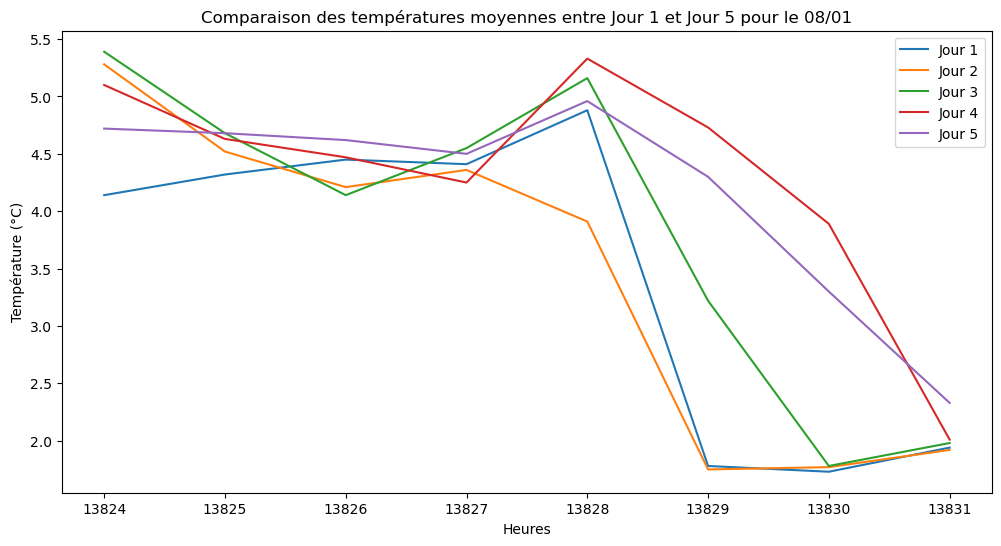

In [ ]:
# comparer les prévisions de température entre chaque colonnes "_jour1" à "_jour5"
plt.figure(figsize=(12, 6))
plt.plot(boulogne_weather["Temp_Avg_jour1"], label="Jour 1")
plt.plot(boulogne_weather["Temp_Avg_jour2"], label="Jour 2")
plt.plot(boulogne_weather["Temp_Avg_jour3"], label="Jour 3")
plt.plot(boulogne_weather["Temp_Avg_jour4"], label="Jour 4")
plt.plot(boulogne_weather["Temp_Avg_jour5"], label="Jour 5")
plt.legend()
plt.title("Comparaison des températures moyennes entre Jour 1 et Jour 5 pour le 08/01")
plt.xlabel("Heures")
plt.ylabel("Température (°C)")
plt.show()

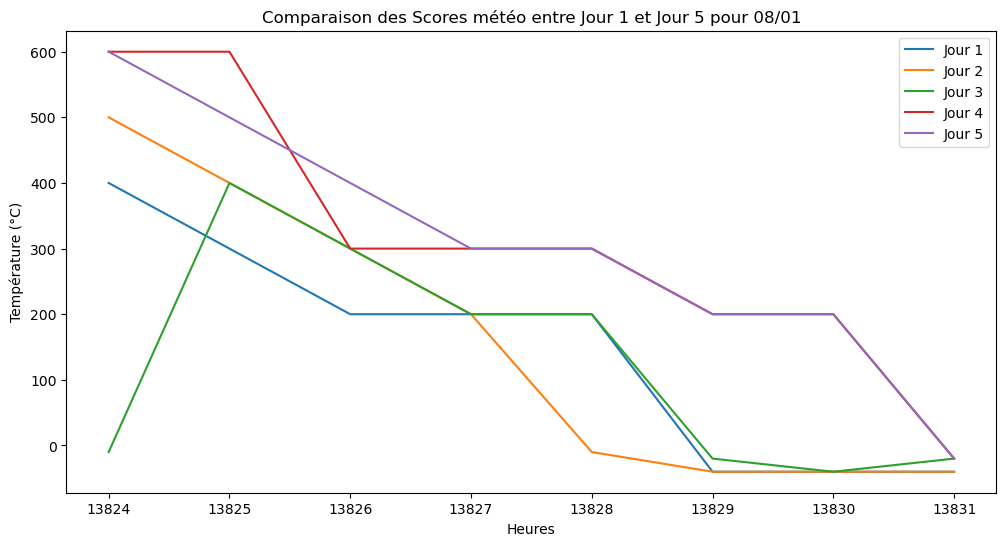

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(boulogne_weather["Weather_Score_jour1"], label="Jour 1")
plt.plot(boulogne_weather["Weather_Score_jour2"], label="Jour 2")
plt.plot(boulogne_weather["Weather_Score_jour3"], label="Jour 3")
plt.plot(boulogne_weather["Weather_Score_jour4"], label="Jour 4")
plt.plot(boulogne_weather["Weather_Score_jour5"], label="Jour 5")
plt.legend()
plt.title("Comparaison des Scores météo entre Jour 1 et Jour 5 pour 08/01")
plt.xlabel("Heures")
plt.ylabel("Température (°C)")
plt.show()

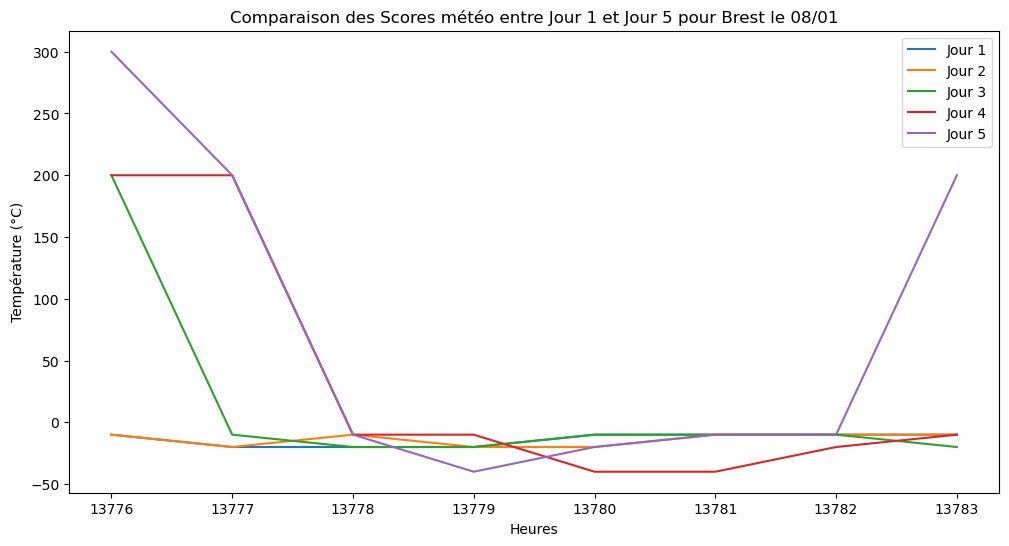

In [ ]:
# Comparer les score météo entre chaque colonnes "_jour1" à "_jour5" pour la ville de "Brest"
brest_weather = top_flop_df[(top_flop_df["Ville_jour1"] == "Brest") & (top_flop_df["Date_jour1"] == "2025-01-08 00:00:00")]

# afficher les informations sur un graphique par jour
plt.figure(figsize=(12, 6))
plt.plot(brest_weather["Weather_Score_jour1"], label="Jour 1")
plt.plot(brest_weather["Weather_Score_jour2"], label="Jour 2")
plt.plot(brest_weather["Weather_Score_jour3"], label="Jour 3")
plt.plot(brest_weather["Weather_Score_jour4"], label="Jour 4")
plt.plot(brest_weather["Weather_Score_jour5"], label="Jour 5")
plt.legend()
plt.title("Comparaison des Scores météo entre Jour 1 et Jour 5 pour Brest le 08/01")
plt.xlabel("Heures")
plt.ylabel("Température (°C)")
plt.show()


In [ ]:
# date ou Nice à eu du "clear sky"
clear_sky_dates = top_flop_df[(top_flop_df["Ville_jour1"] == "Nice") & (top_flop_df["Weather_jour1"] == "clear sky")]["Date_jour1"]
clear_sky_dates.value_counts()

Date_jour1
2025-01-13 00:00:00    8
2024-12-27 00:00:00    8
2025-01-14 00:00:00    8
2025-02-06 00:00:00    8
2024-12-16 00:00:00    8
2024-12-30 00:00:00    8
2024-12-29 00:00:00    8
2025-02-03 00:00:00    8
2024-12-23 00:00:00    8
2024-12-25 00:00:00    8
2024-12-26 00:00:00    8
2025-01-15 00:00:00    7
2025-01-17 00:00:00    7
2025-01-12 00:00:00    7
2024-12-31 00:00:00    6
2024-12-24 00:00:00    6
2025-02-04 00:00:00    6
2025-02-05 00:00:00    6
2024-12-15 00:00:00    6
2024-12-12 00:00:00    6
2024-12-28 00:00:00    5
2024-12-21 00:00:00    5
2024-12-17 00:00:00    5
2024-12-05 00:00:00    5
2025-02-07 00:00:00    4
2025-01-01 00:00:00    4
2025-02-02 00:00:00    3
2025-01-08 00:00:00    3
2025-01-02 00:00:00    3
2025-01-18 00:00:00    3
2025-01-21 00:00:00    3
2024-12-20 00:00:00    3
2025-01-28 00:00:00    3
2025-01-04 00:00:00    2
2025-01-07 00:00:00    2
2024-12-14 00:00:00    2
2025-01-16 00:00:00    2
2024-12-22 00:00:00    2
2024-12-18 00:00:00    1
2025-01-09 00:

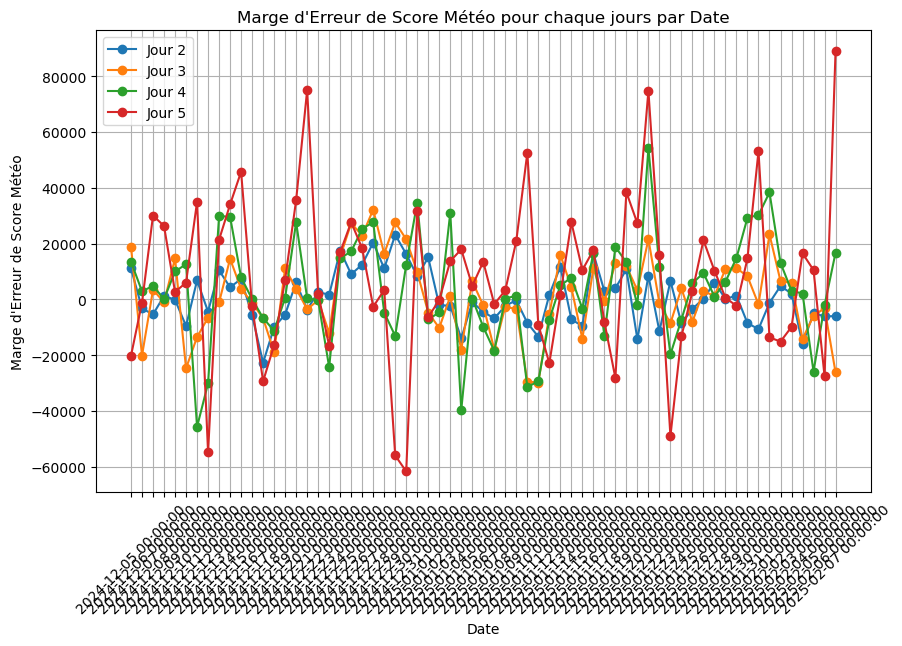

In [ ]:
# Regrouper par date et sommer les scores météo pour chaque jour
weather_scores_sum = all_data.groupby("Date_jour1")[
    ["Weather_Score_jour1", "Weather_Score_jour2", "Weather_Score_jour3", "Weather_Score_jour4", "Weather_Score_jour5"]
].sum()

# Renommer les colonnes pour plus de clarté
weather_scores_sum.columns = ["Jour 1", "Jour 2", "Jour 3", "Jour 4", "Jour 5"]


# Calculer la marge d'erreur entre les "weather_scores" "jour2" et "jour1"
Weather_Error_Margin1 = (weather_scores_sum["Jour 2"] - weather_scores_sum["Jour 1"])
Weather_Error_Margin2 = (weather_scores_sum["Jour 3"] - weather_scores_sum["Jour 1"])
Weather_Error_Margin3 = (weather_scores_sum["Jour 4"] - weather_scores_sum["Jour 1"])
Weather_Error_Margin4 = (weather_scores_sum["Jour 5"] - weather_scores_sum["Jour 1"])

# Tracer un line plot de la marge d'erreur
plt.figure(figsize=(10, 6))
plt.plot(Weather_Error_Margin1.index, Weather_Error_Margin1, marker="o", linestyle="-")
plt.plot(Weather_Error_Margin2.index, Weather_Error_Margin2, marker="o", linestyle="-")
plt.plot(Weather_Error_Margin3.index, Weather_Error_Margin3, marker="o", linestyle="-")
plt.plot(Weather_Error_Margin4.index, Weather_Error_Margin4, marker="o", linestyle="-")

# Ajouter des labels et un titre
plt.xlabel("Date")
plt.ylabel("Marge d'Erreur de Score Météo")
plt.title("Marge d'Erreur de Score Météo pour chaque jours par Date")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(["Jour 2", "Jour 3", "Jour 4", "Jour 5"])

# Afficher le graphique
plt.show()

In [ ]:
# Liste des jours à comparer avec la référence (jour 1)
jours_previsions = ["jour2", "jour3", "jour4", "jour5"]

# Calcul des écarts relatifs pour chaque jour de prévision par rapport à jour1
for jour in jours_previsions:
    all_data[f"Temp_Error_{jour}"] = abs(all_data[f"Temp_Avg_{jour}"] - all_data["Temp_Avg_jour1"]) / all_data["Temp_Avg_jour1"]
    all_data[f"Rain_Error_{jour}"] = abs(all_data[f"Rain_Probability_{jour}"] - all_data["Rain_Probability_jour1"])
    all_data[f"Weather_Score_Error_{jour}"] = abs(all_data[f"Weather_Score_{jour}"] - all_data["Weather_Score_jour1"]) / 200

# Score d'accuracy basé sur les écarts
for jour in jours_previsions:
    all_data[f"Accuracy_{jour}"] = 100 - (
        (all_data[f"Temp_Error_{jour}"] * 40) + 
        (all_data[f"Rain_Error_{jour}"] * 30) + 
        (all_data[f"Weather_Score_Error_{jour}"] * 30)
    )

# Normalisation du score pour qu'il reste entre 0 et 100
for jour in jours_previsions:
    all_data[f"Accuracy_{jour}"] = all_data[f"Accuracy_{jour}"].clip(0, 100)

# Affichage des résultats
all_data[["Ville_jour1", "Date_jour1"] + [f"Accuracy_{jour}" for jour in jours_previsions]].head()


,Ville_jour1,Date_jour1,Accuracy_jour2,Accuracy_jour3,Accuracy_jour4,Accuracy_jour5
0,Paris,2024-12-05 00:00:00,96.300395,96.426877,91.430830,99.905138
1,Paris,2024-12-05 00:00:00,97.741935,98.064516,96.064516,94.516129
2,Paris,2024-12-05 00:00:00,99.939577,99.093656,99.456193,57.001511
3,Paris,2024-12-05 00:00:00,74.299698,37.956193,37.533233,87.432024
4,Paris,2024-12-05 00:00:00,76.589760,36.376106,94.437421,42.926422


In [ ]:
# regrouper pour chaque ville
city_accuracy = all_data.groupby("Ville_jour1")[[f"Accuracy_{jour}" for jour in jours_previsions]].mean()

# Afficher les résultats
display(city_accuracy)

,Accuracy_jour2,Accuracy_jour3,Accuracy_jour4,Accuracy_jour5
Ville_jour1,,,,
Aix-en-Provence,84.818311,80.846021,77.285691,71.822601
Ajaccio,84.797054,78.234356,75.627135,69.244260
Albi,82.827497,77.392227,71.430782,62.775188
Amiens,81.700815,75.439681,67.807335,63.705470
Angers,77.584759,71.015499,64.086915,59.962622
Annecy,82.311125,76.617230,69.660112,67.324011
Arles,82.562800,80.446263,74.783684,71.697443
Avignon,83.014728,80.310968,74.264100,70.495136
Bayonne,83.993515,76.891133,73.396148,65.929388


In [ ]:
# Calculer la moyenne des scores d'accuracy pour chaque ville et garder les latitudes et longitudes
city_accuracy = all_data.groupby("Ville_jour1")[[f"Accuracy_{jour}" for jour in jours_previsions]].mean().reset_index()

# Calculer la moyenne des scores d'accuracy pour chaque ville
city_accuracy["Mean_Accuracy"] = city_accuracy[[f"Accuracy_{jour}" for jour in jours_previsions]].mean(axis=1)

# Trier les villes par la moyenne des scores d'accuracy
city_accuracy = city_accuracy.sort_values(by="Mean_Accuracy", ascending=False)

# Afficher les résultats
display(city_accuracy)

,Ville_jour1,Accuracy_jour2,Accuracy_jour3,Accuracy_jour4,Accuracy_jour5,Mean_Accuracy
17,Chamonix-Mont-Blanc,86.959919,82.542816,78.701018,76.589085,81.198210
34,Nice,84.956460,82.883015,80.988095,73.062847,80.472604
47,Toulon,85.631257,81.766446,79.611370,74.306955,80.329007
0,Aix-en-Provence,84.818311,80.846021,77.285691,71.822601,78.693156
35,Nîmes,83.553631,81.417832,77.684258,71.842509,78.624558
29,Marseille,84.895056,79.957924,76.397237,73.189839,78.610014
31,Montpellier,84.221133,80.209410,77.028911,69.708236,77.791923
6,Arles,82.562800,80.446263,74.783684,71.697443,77.372548
39,Perpignan,84.246197,78.103211,76.346073,69.877269,77.143188
7,Avignon,83.014728,80.310968,74.264100,70.495136,77.021233


In [ ]:
# incorporer le score d'accuracy dans le DataFrame
city_accuracy = pd.merge(city_accuracy, all_data[["Ville_jour1", "Latitude_jour1", "Longitude_jour1"]], on="Ville_jour1")

# Drop duplicates
city_accuracy = city_accuracy.drop_duplicates(subset=["Ville_jour1"])

# Afficher les résultats
display(city_accuracy)

,Ville_jour1,Accuracy_jour2,Accuracy_jour3,Accuracy_jour4,Accuracy_jour5,Mean_Accuracy,Latitude_jour1,Longitude_jour1
0,Chamonix-Mont-Blanc,86.959919,82.542816,78.701018,76.589085,81.198210,45.924670,6.872751
520,Nice,84.956460,82.883015,80.988095,73.062847,80.472604,43.700936,7.268391
1040,Toulon,85.631257,81.766446,79.611370,74.306955,80.329007,43.125731,5.930492
1560,Aix-en-Provence,84.818311,80.846021,77.285691,71.822601,78.693156,43.529842,5.447474
2080,Nîmes,83.553631,81.417832,77.684258,71.842509,78.624558,43.837425,4.360069
2600,Marseille,84.895056,79.957924,76.397237,73.189839,78.610014,43.296174,5.369953
3120,Montpellier,84.221133,80.209410,77.028911,69.708236,77.791923,43.611242,3.876734
3640,Arles,82.562800,80.446263,74.783684,71.697443,77.372548,43.677622,4.630965
4160,Perpignan,84.246197,78.103211,76.346073,69.877269,77.143188,42.698530,2.895312
4680,Avignon,83.014728,80.310968,74.264100,70.495136,77.021233,43.949249,4.805901


In [62]:
# Visualiser les 10 meilleures et 10 pires villes sur une carte
top_25_cities = city_accuracy.head(25)
worst_25_cities = city_accuracy.tail(25)

# Ajouter une colonne pour différencier les catégories
top_25_cities["Category"] = "Top 25"
worst_25_cities["Category"] = "Worst 25"

# Fusionner les deux catégories
top_worst_cities = pd.concat([top_25_cities, worst_25_cities])

# Appliquer une taille uniforme pour toutes les villes
top_worst_cities["Size"] = 5  # Taille fixe pour tous les points

# Définir une palette de couleurs : Rouge pour le Top 10, Bleu pour le Worst 10
color_map = {"Top 25": "red", "Worst 25": "blue"}

# Carte interactive des 10 meilleures et 10 pires villes
fig = px.scatter_mapbox(
    top_worst_cities,
    lat="Latitude_jour1",
    lon="Longitude_jour1",
    color="Category",  
    size="Size",  
    hover_name="Ville_jour1",
    hover_data={"Mean_Accuracy": True},
    mapbox_style="open-street-map",
    zoom=3.5,
    color_discrete_map=color_map,
    size_max=10  
)

fig.show()

C:\Users\j-bal\AppData\Local\Temp\ipykernel_5524\387111209.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\j-bal\AppData\Local\Temp\ipykernel_5524\387111209.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\j-bal\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

